# Dealing with missing data

In [3]:
import pandas as pd
from io import StringIO

csv_data = '''A, B, C, D
1.0, 2.0, 3.0, 4.0
5.0, 6.0,, 8.0
10.0, 11.0, 12.0,'''

df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [4]:
df.isnull().sum()

A     0
 B    0
 C    1
 D    1
dtype: int64

In [5]:
df.values

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [10., 11., 12., nan]])

In [6]:
# drop the rows with missing data
df.dropna()

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [7]:
# drop the columns with missing data
df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [8]:
# only drop rows where all columns are nan
df.dropna(how='all')

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [9]:
# drop rows that have at least 4 non-NaN values
df.dropna(thresh=4)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [10]:
# only drop rows where NaN only appear in specific columns
df.dropna(subset=['A'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


## Input missing values

In [11]:
from sklearn.preprocessing import Imputer
imr = Imputer(missing_values='NaN', strategy='mean', axis=0)
imr = imr.fit(df)
imputed_data = imr.transform(df.values)
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

# Handling categorical data

In [12]:
df = pd.DataFrame([
    ['green', 'M', 10.1, 'class1'],
    ['red', 'L', 13.5, 'class2'],
    ['blue', 'XL', 15.3, 'class1']])
df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [13]:
size_mapping = {'XL': 3, 
                'L': 2, 
                'M': 1}
df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


## Encoding class labels

In [14]:
import numpy as np
class_mapping = {label: idx for idx, label in enumerate(np.unique(df['classlabel']))}
class_mapping

{'class1': 0, 'class2': 1}

In [15]:
df['classlabel'] = df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


reverse the key-value pairs in the mapping

In [16]:
inv_class_mapping = {v: k for k, v in class_mapping.items()}
df['classlabel'] = df['classlabel'].map(inv_class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [17]:
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)
y

array([0, 1, 0])

In [18]:
# use inverse_transform to transform the integer class labels back
class_le.inverse_transform(y)

array(['class1', 'class2', 'class1'], dtype=object)

transform the nominal color column

In [19]:
X = df[['color', 'size', 'price']].values
color_le = LabelEncoder()
X[:, 0] = color_le.fit_transform(X[:, 0])
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

The problem of the above transfomration is that we turn the unorder color categories into ordered categories

The solution is to use **one-hot-encoding**

In [20]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categorical_features=[0])
ohe.fit_transform(X).toarray()

/Users/moumatsu/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[ 0. ,  1. ,  0. ,  1. , 10.1],
       [ 0. ,  0. ,  1. ,  2. , 13.5],
       [ 1. ,  0. ,  0. ,  3. , 15.3]])

## Partitioning datasets

In [21]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df_wine.columns = ['Class label', 'Alcohol',
                   'Malic acid', 'Ash', 
                   'Alcalinity of ash', 'Magnesium', 
                   'Total phenols', 'Flavanoids', 
                   'Nonflavanoid phenols', 
                   'Proanthocyanins', 
                   'Color intensity', 'Hue', 
                   'OD280/OD315 of diluted wines', 
                   'Proline']
print("class labels", np.unique(df_wine['Class label']))

class labels [1 2 3]


In [22]:
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [23]:
# split the datasets
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Bringing features onto the same scale
Decision trees and random forests are one of the very few machine learning algorithms where we don't need to worry about feature scaling. However, the majority of machine learning and optimization algorithms behave much better if features are on the same scale.

The two common approaches:
1. Normalization, which referes to the rescaling of the features to a range of $[0,1]$, which is a special case of min-max scaling.
$$
x_{norm}^{(i)}=\frac{x^{(i)}-x_{min}}{x_{max}-x_{min}}
$$
Here, $x^{(i)}$ is a particular sample, $x_{min},x_{max}$ are the smallest, largest value in a feature column.
2. Standardization, center the feature columns at mean 0 with standard deviation 1 so that the feature columns take the form of a normal distribution
$$
x_{std}^{(i)}=\frac{x^{(i)}-\mu_x}{\sigma_x}
$$
Here, $\mu_x$ is the sample mean of a particular feature column and $\sigma_x$ the corresponding standard deviation, respectively.

In [24]:
# Normalization
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [25]:
# Normalization
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

## Selecting meaningful features
Overfitting means that model fits the parameters too closely to the particular observations in the training dataset but does not generalize well to real data—we say that the model has a high variance. The solution to reduce the geenralization error:
1. Collect more training data
2. Introduce a penalty for complexity via regularization
3. choose a simple model with fewer parameters
4. Reduce the dimension of data

### Regularization
Two classic type of regularization:
1. L1 regularization: tends to penalize large individual weights
2. L2 regularization: yields sparse feature vectors, most feature weights will be zero


In [26]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1', C=0.1)
lr.fit(X_train_std, y_train)
print("Training accuracy: ", lr.score(X_train_std, y_train))
print("Test accuracy: ", lr.score(X_test_std, y_test))


Training accuracy:  0.9838709677419355
Test accuracy:  0.9814814814814815


/Users/moumatsu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/moumatsu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [27]:
lr.intercept_

array([-0.3838427 , -0.15813638, -0.70039315])

In [28]:
lr.coef_

array([[ 0.28030835,  0.        ,  0.        , -0.0279239 ,  0.        ,
         0.        ,  0.71006192,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.23630796],
       [-0.64376831, -0.06899395, -0.05716723,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.92728109,
         0.05975489,  0.        , -0.37092858],
       [ 0.        ,  0.06146184,  0.        ,  0.        ,  0.        ,
         0.        , -0.63652371,  0.        ,  0.        ,  0.49828517,
        -0.35816742, -0.57079252,  0.        ]])

In [29]:
# Plot the regularization path
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'cyan',
          'magenta', 'yellow', 'black', 'pink', 
          'lightgreen', 'lightblue', 
          'gray', 'indigo', 'orange']
weights, params = [], []
c_list = [10**c for c in np.arange(-5,5, dtype=float)]
for c in c_list:
    lr = LogisticRegression(penalty='l1', solver='saga', multi_class='auto', C = c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(c)

weights = np.array(weights)
for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column], label=df_wine.columns[column+1], color=color)

plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', bbox_to_anchor=(1.38, 1.03), ncol=1, fancybox=True)
plt.show()

/Users/moumatsu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/moumatsu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/moumatsu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/moumatsu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/moumatsu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: T

<Figure size 640x480 with 1 Axes>

### Sequential feature selection algorithm
Sequential feature selection algorithms are a family of greedy search algorithms that are used to reduce an initial $d$-dimensional feature space to a $k$-dimensional feature subspace where $k < d$.

A classic sequential feature selection algorithm is Sequential Backward Selection (SBS)
1. Initialize the algorithm with $k=d$, where $d$ is the dimension of the full feature space $X_d$
2. Determine the feature $x^-$ that maximizes the criterion $x^-=\arg\max J(X_k-x))$, where $x\in X_k$
3. Remove the feature $x^-$ from the feature set: $X_{k-1}=X_k-x^-$, $k=k-1$
4. Terminate if $k$ equals to the number of desired features, if not, go to step 2.

In [38]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

class SBS():
    def __init__(self, estimator, k_features,
                scoring=accuracy_score,
                test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator) # classfication on the feature subsets
        self.k_features = k_features # desired number of features we want to return
        self.test_size = test_size
        self.random_state = random_state
        
    def fit(self, X, y):
        X_train, X_test, y_train, y_test = \
                    train_test_split(X, y, test_size=self.test_size, random_state=self.random_state)
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim)) # column indices of the final feature subsets
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]
        
        while dim > self.k_features:
            scores = []
            subsets = []
            
            for p in combinations(self.indices_, r = dim - 1):
                score = self._calc_score(X_train, y_train, X_test, y_test, p)
                scores.append(score)
                subsets.append(p)
                
            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
            
            self.scores_.append(scores[best])
        
        self.k_score_ = self.scores_[-1]
        
        return self
    
    def tranform(self, X):
        return X[:, self.indices_]
    
    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        
        return score

see our SBS implementation in action using the KNN classifier from scikit-learn:

In [39]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
knn = KNeighborsClassifier(n_neighbors=2)
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

plot the classification accuracy of the KNN classifier that was calculated on the validation dataset

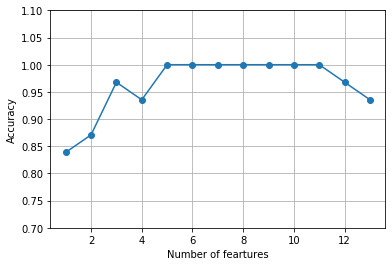

In [41]:
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.1])
plt.xlabel('Number of feartures')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [42]:
# list the five features that yields the best performance on the validation set
k5 = list(sbs.subsets_[8])
print(df_wine.columns[1:][k5])

Index(['Alcohol', 'Malic acid', 'Alcalinity of ash', 'Hue', 'Proline'], dtype='object')


In [44]:
# evaluate the performance on the original test set with complete feature set
knn.fit(X_train_std, y_train)
print("Training accuracy: ", knn.score(X_train_std, y_train))
print("Test accuracy: ", knn.score(X_test_std, y_test))

Training accuracy:  0.9838709677419355
Test accuracy:  0.9444444444444444


In [45]:
# evaluate the performance with the selected feature subset
knn.fit(X_train_std[:, k5], y_train)
print("Training accuracy: ", knn.score(X_train_std[:, k5], y_train))
print("Test accuracy: ", knn.score(X_test_std[:, k5], y_test))

Training accuracy:  0.9596774193548387
Test accuracy:  0.9629629629629629


## Assessing feature importance with random forests

we will now train a forest of 10,000 trees on the Wine dataset and rank the 13 features by their respective importance measures (without need of normalization or standardization

In [47]:
from sklearn.ensemble import RandomForestClassifier
feat_labels = df_wine.columns[1:]
forest = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[f], importances[indices[f]]))

 1) Alcohol                        0.182483
 2) Malic acid                     0.158610
 3) Ash                            0.150948
 4) Alcalinity of ash              0.131987
 5) Magnesium                      0.106589
 6) Total phenols                  0.078243
 7) Flavanoids                     0.060718
 8) Nonflavanoid phenols           0.032033
 9) Proanthocyanins                0.025400
10) Color intensity                0.022351
11) Hue                            0.022078
12) OD280/OD315 of diluted wines   0.014645
13) Proline                        0.013916


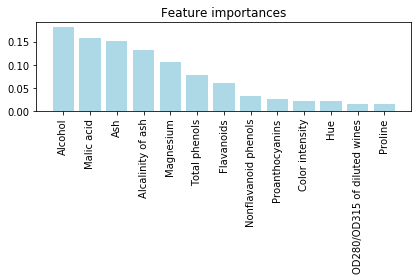

In [48]:
plt.title('Feature importances')
plt.bar(range(X_train.shape[1]),
       importances[indices],
       color='lightblue',
       align='center')
plt.xticks(range(X_train.shape[1]),
          feat_labels, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

we can also use the therehold to choose the features